In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Walmart_Store_sales.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
pfr=pandas_profiling.ProfileReport(df)
pfr.to_file('Sales.html')

In [3]:
#QUESTION 1:Store having maximum Sales(or which store is having maximum weekly sales in any week)


df[["Store","Weekly_Sales"]][df["Weekly_Sales"]==df["Weekly_Sales"].max()]

,Store,Weekly_Sales
1905,14,3818686.45


In [4]:
#QUESTION 2:Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation


df2=df[["Store","Weekly_Sales"]].groupby('Store').agg({'Weekly_Sales':(np.std,np.mean)})

df2.sort_values(('Weekly_Sales','std'),ascending=False)

Weekly_Sales              
                 std          mean
Store                             
14     317569.949476  2.020978e+06
10     302262.062504  1.899425e+06
20     275900.562742  2.107677e+06
4      266201.442297  2.094713e+06
13     265506.995776  2.003620e+06
23     249788.038068  1.389864e+06
27     239930.135688  1.775216e+06
2      237683.694682  1.925751e+06
39     217466.454833  1.450668e+06
6      212525.855862  1.564728e+06
35     211243.457791  9.197250e+05
19     191722.638730  1.444999e+06
41     187907.162766  1.268125e+06
28     181758.967539  1.323522e+06
18     176641.510839  1.084718e+06
24     167745.677567  1.356755e+06
11     165833.887863  1.356383e+06
22     161251.350631  1.028501e+06
1      155980.767761  1.555264e+06
12     139166.871880  1.009002e+06
32     138017.252087  1.166568e+06
45     130168.526635  7.859814e+05
21     128752.812853  7.560691e+05
31     125855.942933  1.395901e+06
15     120538.652043  6.233125e+05
40     119002.112858  9.641280e+05
25     112976.788600  7.067215e+05
7      112585.469220  5.706173e+05
17     112162.936087  8.935814e+05
26     110431.288141  1.002912e+06
8      106280.829881  9.087495e+05
34     104630.164676  9.667816e+05
29      99120.136596  5.394514e+05
16      85769.680133  5.192477e+05
9       69028.666585  5.439806e+05
36      60725.173579  3.735120e+05
42      50262.925530  5.564039e+05
3       46319.631557  4.027044e+05
38      42768.169450  3.857317e+05
43      40598.413260  6.333247e+05
5       37737.965745  3.180118e+05
44      24762.832015  3.027489e+05
33      24132.927322  2.598617e+05
30      22809.665590  4.385796e+05
37      21837.461190  5.189003e+05

In [5]:
df2[('Weekly_Sales','std by mean')]=df2[('Weekly_Sales','std')]/df2[('Weekly_Sales','mean')]

In [6]:
df2.sort_values(('Weekly_Sales','std by mean'),ascending=False)

Weekly_Sales                          
                 std          mean std by mean
Store                                         
35     211243.457791  9.197250e+05    0.229681
7      112585.469220  5.706173e+05    0.197305
15     120538.652043  6.233125e+05    0.193384
29      99120.136596  5.394514e+05    0.183742
23     249788.038068  1.389864e+06    0.179721
21     128752.812853  7.560691e+05    0.170292
45     130168.526635  7.859814e+05    0.165613
16      85769.680133  5.192477e+05    0.165181
18     176641.510839  1.084718e+06    0.162845
36      60725.173579  3.735120e+05    0.162579
25     112976.788600  7.067215e+05    0.159860
10     302262.062504  1.899425e+06    0.159133
14     317569.949476  2.020978e+06    0.157137
22     161251.350631  1.028501e+06    0.156783
39     217466.454833  1.450668e+06    0.149908
41     187907.162766  1.268125e+06    0.148177
12     139166.871880  1.009002e+06    0.137925
28     181758.967539  1.323522e+06    0.137330
6      212525.855862  1.564728e+06    0.135823
27     239930.135688  1.775216e+06    0.135155
19     191722.638730  1.444999e+06    0.132680
13     265506.995776  2.003620e+06    0.132514
20     275900.562742  2.107677e+06    0.130903
4      266201.442297  2.094713e+06    0.127083
9       69028.666585  5.439806e+05    0.126895
17     112162.936087  8.935814e+05    0.125521
24     167745.677567  1.356755e+06    0.123637
40     119002.112858  9.641280e+05    0.123430
2      237683.694682  1.925751e+06    0.123424
11     165833.887863  1.356383e+06    0.122262
5       37737.965745  3.180118e+05    0.118668
32     138017.252087  1.166568e+06    0.118310
8      106280.829881  9.087495e+05    0.116953
3       46319.631557  4.027044e+05    0.115021
38      42768.169450  3.857317e+05    0.110875
26     110431.288141  1.002912e+06    0.110111
34     104630.164676  9.667816e+05    0.108225
1      155980.767761  1.555264e+06    0.100292
33      24132.927322  2.598617e+05    0.092868
42      50262.925530  5.564039e+05    0.090335
31     125855.942933  1.395901e+06    0.090161
44      24762.832015  3.027489e+05    0.081793
43      40598.413260  6.333247e+05    0.064104
30      22809.665590  4.385796e+05    0.052008
37      21837.461190  5.189003e+05    0.042084

In [7]:
df["Date"]=pd.to_datetime(df["Date"])
type(df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df["Date"]

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [9]:
#QUESTION 3:Which store/s has good quarterly growth rate in Q3’2012


df3=df[["Store","Weekly_Sales","Date"]][(df["Date"] > "2012-04-01") & (df["Date"] < "2012-07-01")].groupby('Store').agg({'Weekly_Sales':np.sum}).reset_index(inplace=False)
df3
df3.rename(columns={'Weekly_Sales':'Weekly_Sales_Q2'},inplace=True)

In [10]:
df4=df[["Store","Weekly_Sales","Date"]][(df["Date"] > "2012-07-01") & (df["Date"] < "2012-10-01")].groupby('Store').agg({'Weekly_Sales':np.sum}).reset_index(inplace=False)
df4.rename(columns={"Weekly_Sales":"Weekly_Sales_Q3"},inplace=True)

In [11]:
df_final=pd.merge(df3,df4,how='inner',on='Store')
df_final
df_final["Growth_in_Sales_Q3"]=df_final["Weekly_Sales_Q3"]-df_final["Weekly_Sales_Q2"]
df_final.sort_values('Growth_in_Sales_Q3',ascending=False)

,Store,Weekly_Sales_Q2,Weekly_Sales_Q3,Growth_in_Sales_Q3
15,16,6626133.44,6441311.11,-184822.33
6,7,7613593.92,7322393.92,-291200.00
43,44,4322555.33,4020486.01,-302069.32
32,33,3512138.05,3177072.43,-335065.62
34,35,10753570.97,10252122.68,-501448.29
35,36,4090378.90,3578123.58,-512255.32
4,5,4427262.21,3880621.88,-546640.33
2,3,5562668.16,4966495.93,-596172.23
37,38,5732362.70,5129297.64,-603065.06
29,30,5786335.45,5181974.44,-604361.01


In [12]:
pd.options.display.float_format='{:.6f}'.format

In [13]:
#QUESTION 4:Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


df_holiday=df[["Weekly_Sales","Holiday_Flag"]].groupby('Holiday_Flag').mean().reset_index(inplace=False)

In [14]:
df_holiday["Weekly_Sales"][0]

1041256.3802088564

In [15]:
df_better_holiday_sales=df[["Weekly_Sales","Holiday_Flag",'Date']][df["Holiday_Flag"]==1][df["Weekly_Sales"] > df_holiday["Weekly_Sales"][0]]

<ipython-input-15-da27135a8258>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_better_holiday_sales=df[["Weekly_Sales","Holiday_Flag",'Date']][df["Holiday_Flag"]==1][df["Weekly_Sales"] > df_holiday["Weekly_Sales"][0]]


In [16]:
#QUESTION 5:Provide a monthly and semester view of sales in units and give insights

df["month"]=df["Date"].dt.month

In [17]:
##  net sales across all stores in a given month  ##

df[["Weekly_Sales","month"]].groupby('month').sum()

,Weekly_Sales
month,
1,426426265.050000
2,522025682.890000
3,553486409.570000
4,645323889.620001
5,605696592.190000
6,575017963.770000
7,593313937.180000
8,564231699.510001
9,590532262.850000


In [18]:
## Net sales in each month and for each store ##

df[['Store',"Weekly_Sales","month"]].groupby(["month",'Store']).agg({'Weekly_Sales':np.sum})

Weekly_Sales
month Store                
1     1     14270049.210000
      2     17712298.050000
      3      3714150.800000
      4     19415594.090000
      5      2974447.520000
...                     ...
12    41    16106031.860000
      42     6118204.260000
      43     6792566.530000
      44     3306131.140000
      45    10602538.620000

[540 rows x 1 columns]

In [19]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,2010-05-02,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,5
1,1,2010-12-02,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,12
2,1,2010-02-19,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2
3,1,2010-02-26,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2
4,1,2010-05-03,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,5


C:\Users\Abhineet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

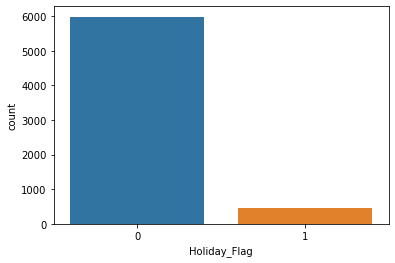

In [20]:
sns.countplot('Holiday_Flag',data=df)

In [21]:
df["Day"]=df["Date"].dt.day
df["Day"]

0        2
1        2
2       19
3       26
4        3
        ..
6430    28
6431    10
6432    10
6433    19
6434    26
Name: Day, Length: 6435, dtype: int64

In [22]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,Day
0,1,2010-05-02,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,5,2
1,1,2010-12-02,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,12,2
2,1,2010-02-19,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2,19
3,1,2010-02-26,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2,26
4,1,2010-05-03,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,5,3


C:\Users\Abhineet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


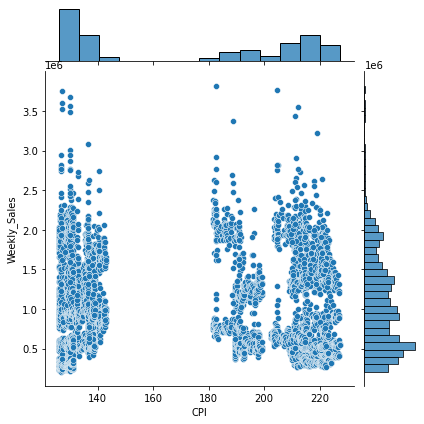

In [23]:
sns.jointplot('CPI','Weekly_Sales',data=df)

C:\Users\Abhineet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


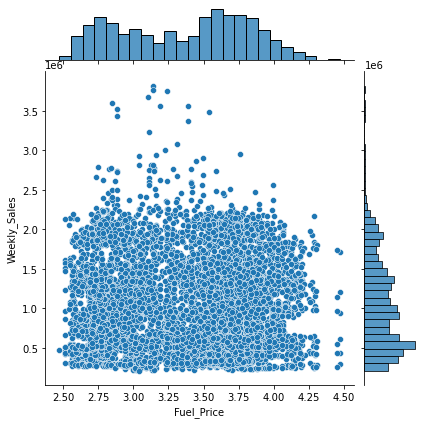

In [24]:
sns.jointplot('Fuel_Price','Weekly_Sales',data=df)

C:\Users\Abhineet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

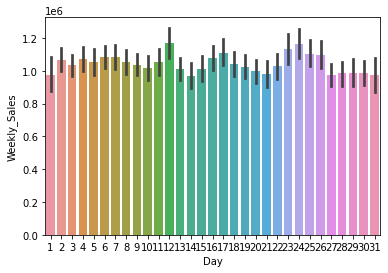

In [25]:
sns.barplot('Day','Weekly_Sales',data=df)

In [26]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'month', 'Day'],
      dtype='object')

In [27]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,Day
0,1,2010-05-02,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,5,2
1,1,2010-12-02,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,12,2
2,1,2010-02-19,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2,19
3,1,2010-02-26,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2,26
4,1,2010-05-03,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,5,3


In [28]:
df["year"]=df["Date"].dt.year

In [29]:
df.drop(['Date'],axis=1,inplace=True)

In [30]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,Day,year
0,1,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,5,2,2010
1,1,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,12,2,2010
2,1,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,2,19,2010
3,1,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,2,26,2010
4,1,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,5,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.950000,0,64.880000,3.997000,192.013558,8.684000,9,28,2012
6431,45,733455.070000,0,64.890000,3.985000,192.170412,8.667000,5,10,2012
6432,45,734464.360000,0,54.470000,4.000000,192.327265,8.667000,12,10,2012
6433,45,718125.530000,0,56.470000,3.969000,192.330854,8.667000,10,19,2012


C:\Users\Abhineet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


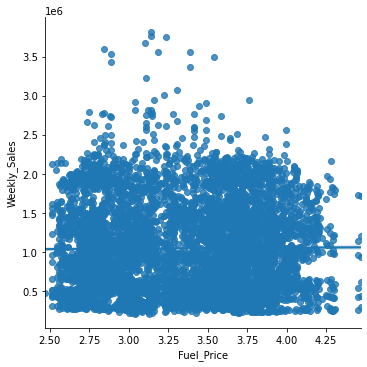

In [31]:
sns.lmplot("Fuel_Price",'Weekly_Sales',df)

In [32]:
df_1=df[df["Store"]==1]

In [34]:
X=df_1[['Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'month', 'Day','year']]

y=df_1["Weekly_Sales"]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [36]:
reg=LinearRegression().fit(X_train,y_train)


In [37]:
reg.score(X_test,y_test)
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
reg.predict(X_test)


array([1477845.59884614, 1553311.55003661, 1504372.40471512,
       1675992.03328055, 1492486.70333546, 1537732.38235521,
       1564238.89798254, 1702625.70738304, 1592041.0313254 ,
       1465192.04655319, 1724467.27751577, 1462696.32913864,
       1504133.44068718, 1517421.0914793 , 1712751.52952969,
       1536309.82613832, 1505897.10046226, 1576875.99129415,
       1546669.92296672, 1534101.61359125, 1618711.74774033,
       1484827.92602664, 1617992.33296329, 1450520.13955331,
       1492367.88304019, 1584789.91241622, 1560280.71558386,
       1535944.084647  , 1568843.72525185])

In [39]:
reg.score(X_test,y_test)

0.5363195575937092

In [40]:
mean_squared_error(y_test,reg.predict(X_test))

6994169472.227678

In [41]:
reg.coef_

array([  50356.45547432,   -3295.39995131,  112125.6425284 ,
         35006.43086581,   11460.17806054,    3416.34520848,
         -4542.23732091, -190829.62490892])

In [42]:
r2_score(y_test,reg.predict(X_test))

0.5363195575937092

In [44]:
actual_pred_df=pd.DataFrame()
actual_pred_df["actual_sales"]=y_test
actual_pred_df["predicted_sales"]=reg.predict(X_test)
actual_pred_df

,actual_sales,predicted_sales
129,1439123.710000,1477845.598846
84,1514259.780000,1553311.550037
75,1455119.970000,1504372.404715
109,1675431.160000,1675992.033281
48,1444732.280000,1492486.703335
78,1624383.750000,1537732.382355
62,1559889.000000,1564238.897983
95,1584083.950000,1702625.707383
122,1697230.960000,1592041.031325
11,1391256.120000,1465192.046553


In [45]:
actual_pred_df["diff"]=actual_pred_df["predicted_sales"]-actual_pred_df["actual_sales"]
actual_pred_df[(actual_pred_df["diff"] > -1000) & (actual_pred_df["diff"] < 1000)]

,actual_sales,predicted_sales,diff
109,1675431.160000,1675992.033281,560.873281
